In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
%matplotlib inline

In [3]:
path = "/Users/zzhang/Desktop"
dataset = os.path.join(path , "fbs_v1_store_product_region.csv")

fbs_raw = pd.read_csv(dataset)


,candidates,city,state,store_count
0,208,Elizabeth,New Jersey,2
1,54,Elizabeth City,NC,3
2,123,Elizabethtown,Kentucky,42
3,153,Elk Grove,CA,42
4,69,Elyria,Ohio,21


In [9]:
fbs_raw['reach_max'] = fbs_raw['candidates'].apply(lambda x : 1 if x == fbs_raw['candidates'].max() else 0)
fbs_raw.head(5)

fbw_state = fbs_raw.groupby('state')

,candidates,city,state,store_count,reach_max
0,208,Elizabeth,New Jersey,2,0
1,54,Elizabeth City,NC,3,0
2,123,Elizabethtown,Kentucky,42,0
3,153,Elk Grove,CA,42,0
4,69,Elyria,Ohio,21,0


## How many stores reach the 500 max limit

In [11]:
fbs_raw['reach_max'].value_counts()

0    9701
1     497
Name: reach_max, dtype: int64

In [17]:
pd.DataFrame(fbw_state.reach_max.value_counts())

reach_max
state                reach_max           
AK                   0                  6
AL                   0                 73
                     1                 10
AR                   0                 61
AZ                   0                 67
                     1                 10
Alabama              0                111
                     1                  5
Arizona              0                 85
                     1                  8
Arkansas             0                 65
CA                   0                370
                     1                 23
CO                   0                 56
                     1                  6
CT                   0                 84
California           0                775
                     1                 19
Colorado             0                 67
                     1                  3
Connecticut          0                103
                     1                  5
DC                   0                  6
Delaware             0                 12
District of Columbia 0                 18
FL                   0                311
                     1                 19
Florida              0                646
                     1                 25
GA                   0                160
...                                   ...
SC                   0                 91
                     1                  2
SD                   0                 12
South Carolina       0                140
                     1                  5
TN                   0                 98
                     1                  6
TX                   0                244
                     1                 27
Tennessee            0                164
                     1                  4
Texas                0                437
                     1                 37
UT                   0                 40
Utah                 0                 81
VA                   0                106
                     1                  3
Virginia             0                120
                     1                  3
WA                   0                 53
WI                   0                 33
                     1                  2
WV                   0                 24
WY                   0                  6
Washington           0                 95
                     1                  3
West Virginia        0                 27
Wisconsin            0                 44
                     1                  2
Wyoming              0                 15

[154 rows x 1 columns]

## Distribution of prod candidates count

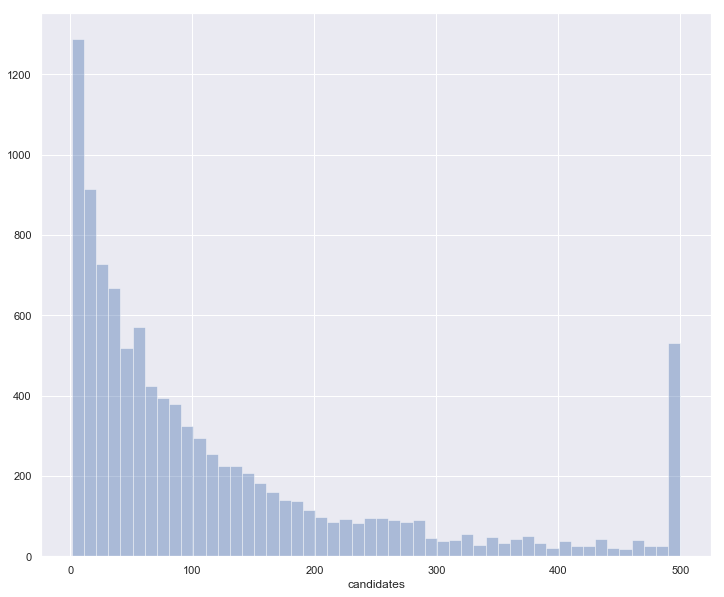

In [21]:
plt.figure()
sns.set(rc={'figure.figsize':(12,10)})
sns.distplot(fbs_raw.candidates, hist=True, kde=False, bins=50)
plt.show()

## correlation between store count and cadidate count

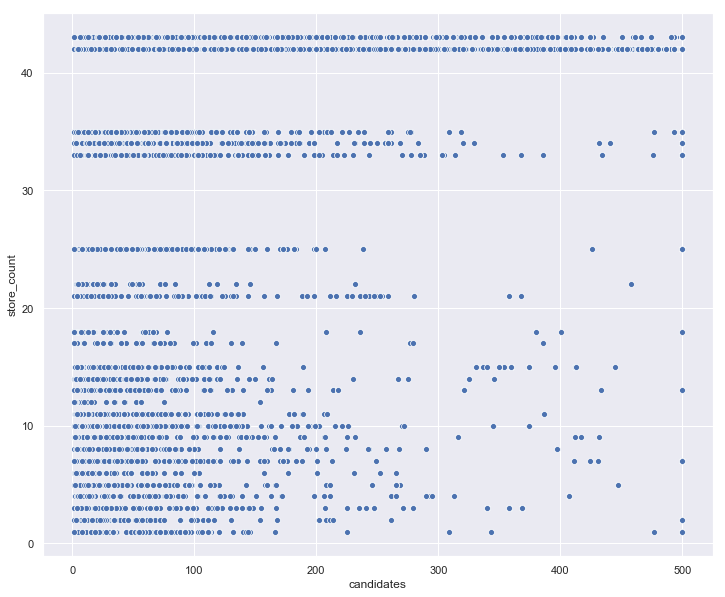

In [20]:
sns.scatterplot(x="candidates", y="store_count", data=fbs_raw)